<center><h1>Explore Vaccines Tweets - proxy+Labelled data
   </h1></center>

# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.

The following vaccines are included:  
* Pfizer/BioNTech;   
* Sinopharm;  
* Sinovac;  
* Moderna;  
* Oxford/AstraZeneca;   
* Covaxin;   
* Sputnik V.  



# Data preparation

## Load packages

In [1]:
! pip install tensorflow==2.6 tensorflow-gpu==2.6 seaborn  lightgbm   pandas plotly  matplotlib nltk numpy gensim wordcloud textblob neattext scikit_learn nbformat transformers tensorflow_hub bert-tensorflow  tf-models-official

  Using cached tensorflow-2.6.0-cp38-cp38-manylinux2010_x86_64.whl (458.4 MB)
  Using cached tensorflow_gpu-2.6.0-cp38-cp38-manylinux2010_x86_64.whl (458.4 MB)
  Using cached lightgbm-3.3.1-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached nltk-3.6.5-py3-none-any.whl (1.5 MB)
  Using cached gensim-4.1.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached neattext-0.1.2-py3-none-any.whl (114 kB)
  Using cached transformers-4.12.2-py3-none-any.whl (3.1 MB)
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached bert_tensorflow-1.0.4-py2.py3-none-any.whl (64 kB)
  Using cached tf_models_official-2.6.0-py2.py3-none-any.whl (1.8 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none

In [2]:
#! pip install tensorflow==2.6




In [3]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
##
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
##
import warnings
warnings.simplefilter("ignore")

## Load data

In [4]:
tweets_df = pd.read_csv("tweets_unlabelled_1L_proxy_labels.csv", encoding='utf-8')
train_labelled_df= pd.read_csv("clean_tweets_labelled_train.csv", encoding='utf-8')

In [5]:
tweets_df=tweets_df.append(train_labelled_df)

In [6]:
len(tweets_df)

99147

# Data exploration


## Glimpse the data

### For SSl splitting the data to 70-30  , where 30 will be used for final prediction task 





In [7]:
# seperate off train and test
#train = tweets_df.iloc[90000:, :]
#test = tweets_df.iloc[14469:, :]
train = tweets_df #.sample(frac=0.7,random_state=200)
print(len(train))
#test=tweets_df.drop(train.index)
#print(len(test))


99147


### Deep Learning

train["label"].unique()

In [8]:
import tensorflow  

labels = tensorflow.keras.utils.to_categorical(train["label"], dtype="float32")

In [9]:
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [10]:
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional,SpatialDropout1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers, Sequential

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

from transformers import BertTokenizer
from  official.nlp.bert import tokenization
from transformers import TFBertModel

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History

from tensorflow.keras import losses


#import tensorflow_hub as hub 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#import gensim

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix,recall_score,precision_score,make_scorer
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean, stdev
import lightgbm as lgb

import joblib
 

In [11]:
max_words = 5000
max_len = 200

n_epochs = 8
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train["clean_data"].values.astype('U'))
sequences = tokenizer.texts_to_sequences(train["clean_data"].values.astype('U'))
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  134 2653 4916]
 [   0    0    0 ... 1264 1212 3884]
 [   0    0    0 ...  110  244  230]
 ...
 [   0    0    0 ...   22  114  151]
 [   0    0    0 ...   37   33   22]
 [   0    0    0 ... 4215   31 1998]]


In [12]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

74360 24787 74360 24787


In [13]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    


In [14]:
## LSTM 


vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
max_len=50



sgd1 = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(15,dropout=0.5))
model1.add(Dense(3,activation='softmax'))

# initializing early stopping 
early_stopping = EarlyStopping(monitor='loss', patience=3)

print(model1.summary())
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer=sgd1, 
               metrics=['accuracy'])
checkpoint = ModelCheckpoint('model/dl/lstm_best_model.h5', monitor='val_loss', save_best_only=True)
# Train model
batch_size = 64
history1 = model1.fit(X_train, y_train,
                      validation_data=(X_test, y_test),callbacks=[early_stopping,checkpoint],
                      batch_size=batch_size, epochs=epochs, verbose=1)
#model1.save('lstm_best_model.h5')
print('LSTM Best model saved')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 15)                2880      
_________________________________________________________________
dense (Dense)                (None, 3)                 48        
Total params: 166,032
Trainable params: 166,032
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1162/1162 [==============================] - 27s 21ms/step - loss: 0.3322 - accuracy: 0.9038 - val_l

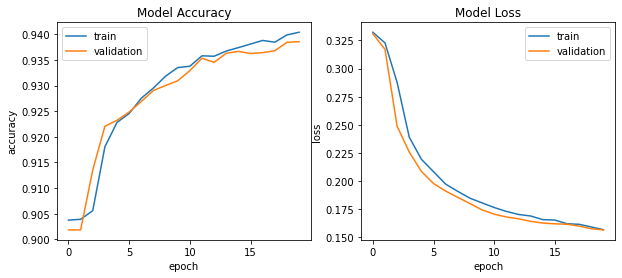

In [15]:
plot_training_hist(history1)

In [16]:
## BILSTM

sgd2 = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model2= Sequential()
model2.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dropout(0.4))
model2.add(Dense(3, activation='softmax'))

# initializing early stopping 
early_stopping = EarlyStopping(monitor='loss', patience=3)

print(model2.summary())

# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=sgd2, 
               metrics=['accuracy'])
checkpoint = ModelCheckpoint('model/dl/bi_lstm_best_model.h5', monitor='val_loss', save_best_only=True)
# Train model

batch_size = 64
history2 = model2.fit(X_train, y_train,
                      validation_data=(X_test, y_test),callbacks=[early_stopping,checkpoint],
                      batch_size=batch_size, epochs=epochs, verbose=1)
#model2.save('bi_lstm_best_model.h5')
print('BILSTM Best model saved')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

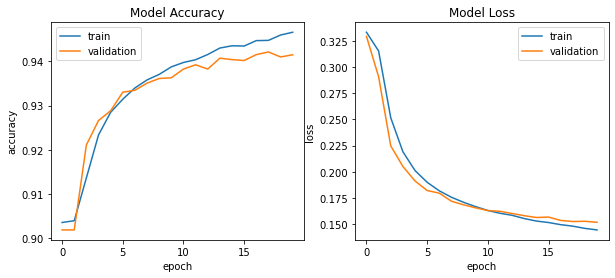

In [17]:
plot_training_hist(history2)

In [18]:
## GRU

sgd3 = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model3= Sequential()
model3.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(GRU(units=64,  dropout=0.2, recurrent_dropout=0.2))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))

# initializing early stopping 
early_stopping = EarlyStopping(monitor='loss', patience=3)

print(model3.summary())

# Compile model
model3.compile(loss='categorical_crossentropy', optimizer=sgd3, 
               metrics=['accuracy'])

checkpoint = ModelCheckpoint('model/dl/dlgru_best_model.h5', monitor='val_loss', save_best_only=True)
# Train model

batch_size = 64
history3 = model3.fit(X_train, y_train,
                      validation_data=(X_test, y_test),callbacks=[early_stopping,checkpoint],
                      batch_size=batch_size, epochs=epochs, verbose=1)
#model3.save('gru_best_model.h5')
print('GRU Best model saved')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 182,115
Trainable params: 182,115
Non-trainable params: 0
________________________________________________

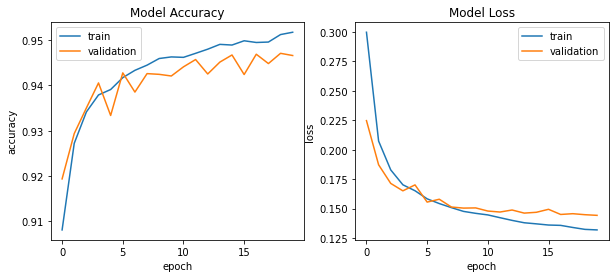

In [19]:
plot_training_hist(history3)

<b><u>BILSTM Model seems to perform well compared to othe  deep learning models </b></u>